# House Price Prediction

This project is from kaggle competition. https://www.kaggle.com/c/house-prices-advanced-regression-techniques

The objective is to predict house sales price based on a number of features. 

Let's start with importing necessary modules. 

In [1]:
import numpy as np
import pandas as pd 
import os
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import seaborn as sns
import matplotlib.pyplot as plt

plotly.tools.set_credentials_file(username='JianweiBao', api_key='U9Ff5soPF5J9mHYtYgse')

import plotly.offline as off
off.init_notebook_mode(connected=True)

print('# File sizes')
for f in os.listdir(r'C:\Users\baoji\Desktop\House Prices Advanced Regression Techniques'):
    if 'zip' not in f:
        print(f.ljust(30) + str(round(os.path.getsize(r'C:\Users\baoji\Desktop\House Prices Advanced Regression Techniques/' + f) / 1000000, 2)) + 'MB')

# File sizes
data_description.txt          0.01MB
sample_submission.csv         0.03MB
sample_submission.csv.gz      0.02MB
test.csv                      0.45MB
test.csv.gz                   0.08MB
train.csv                     0.46MB
train.csv.gz                  0.09MB


In [2]:
train=pd.read_csv(r'C:\Users\baoji\Desktop\House Prices Advanced Regression Techniques/train.csv')
print(train.shape)
train.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test=pd.read_csv(r'C:\Users\baoji\Desktop\House Prices Advanced Regression Techniques/test.csv')
print(test.shape)
test.head()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Data Preprocessing

1. Identify and delete the outliers
2. Normalize skewed features and the response variable by taking log(feature + 1)
3. Replace missing values with the mean of their respective columns
4. Create dummy variables for categorical features

# Ourliers

Outliers are observations deviate to a notable extent from the typical pattern. 

Firstly, we will find important features by plotting the correlation matrix, and then look for outliers in these important features.

In [5]:
corr=train.corr()
data = [go.Heatmap( z=corr.values.tolist(),x=corr.columns,y=corr.columns, colorscale='Viridis')]
layout={'title': "Correlation between Variables"}
off.iplot({'data':data,"layout":layout})

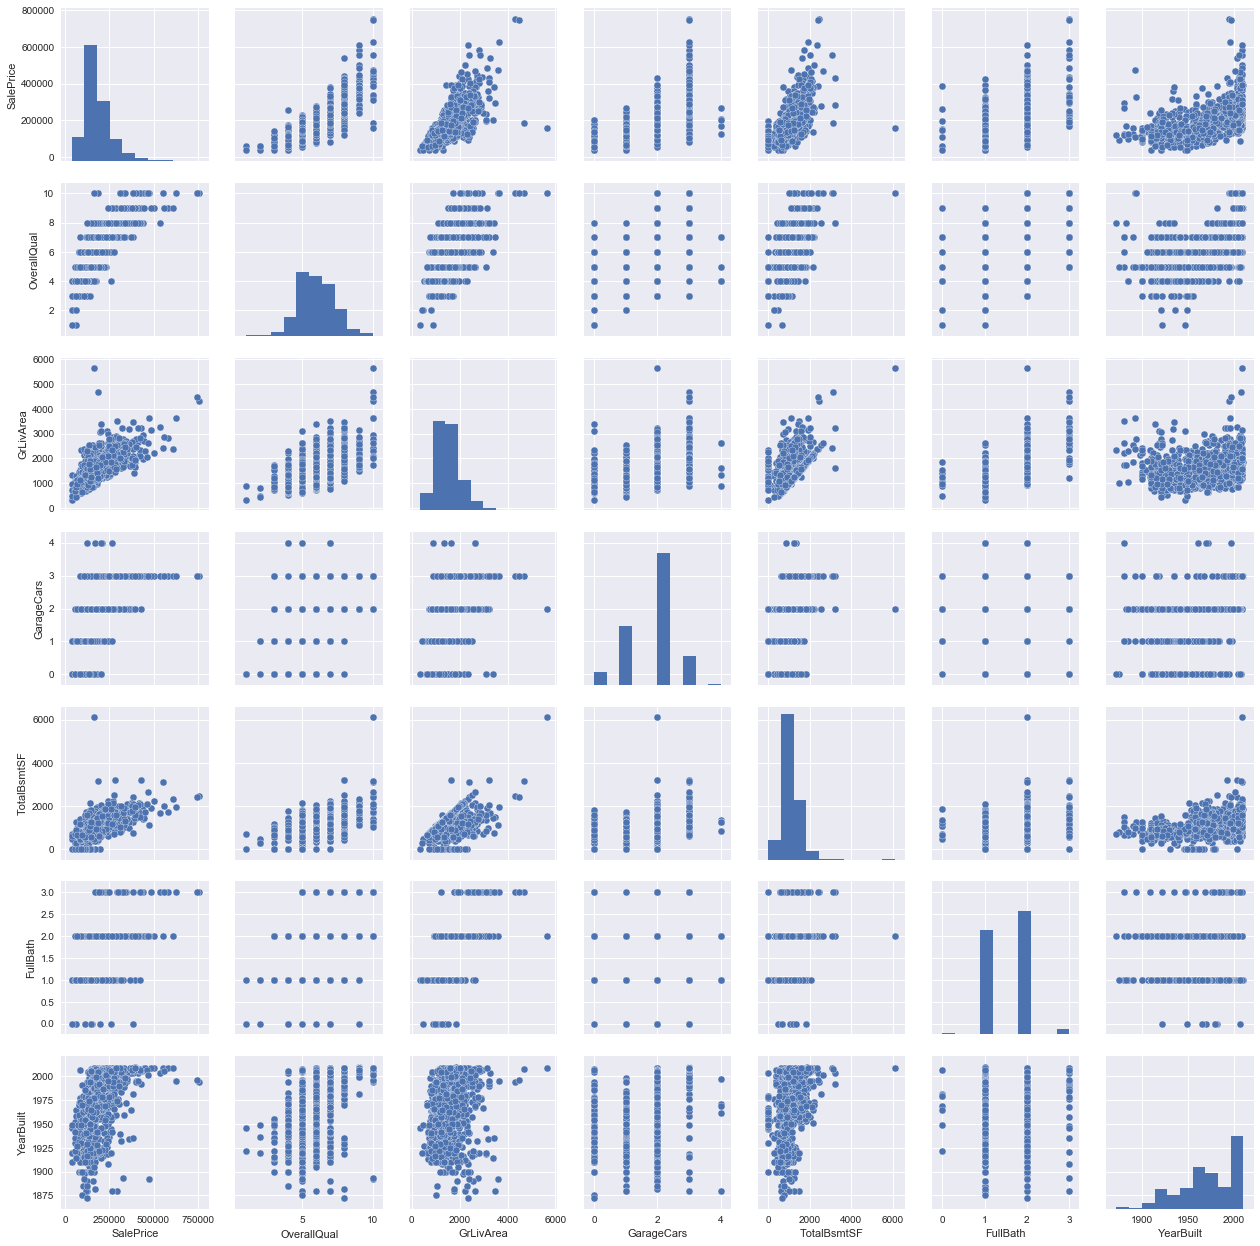

In [6]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

In [7]:
def plotscatter(variable,xvariable,plottype):
    data = [dict(
      type = plottype,
      x = train[variable],
      y = train[xvariable],
      mode = 'markers',
      #transforms = [dict(
      #  type = 'groupby',
      #  groups = train[variable],

      #)]
    )]

    layout={
            'xaxis': {'title': variable},
            'yaxis': {'title': "Sales Price"},
            "title":"Distribution of "+ xvariable + " by " + variable
        }


    off.iplot({'data': data, 'layout':layout }, validate=False)
    
    

In [8]:
plotscatter('GrLivArea','SalePrice','scatter')

We see those two houses in right that do not follow the pattern in every scatter plot, so we will define them as outliers and remove them.

In [9]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
plotscatter('GrLivArea','SalePrice','scatter')

Let's check the scatter plots again, the outliers are gone.

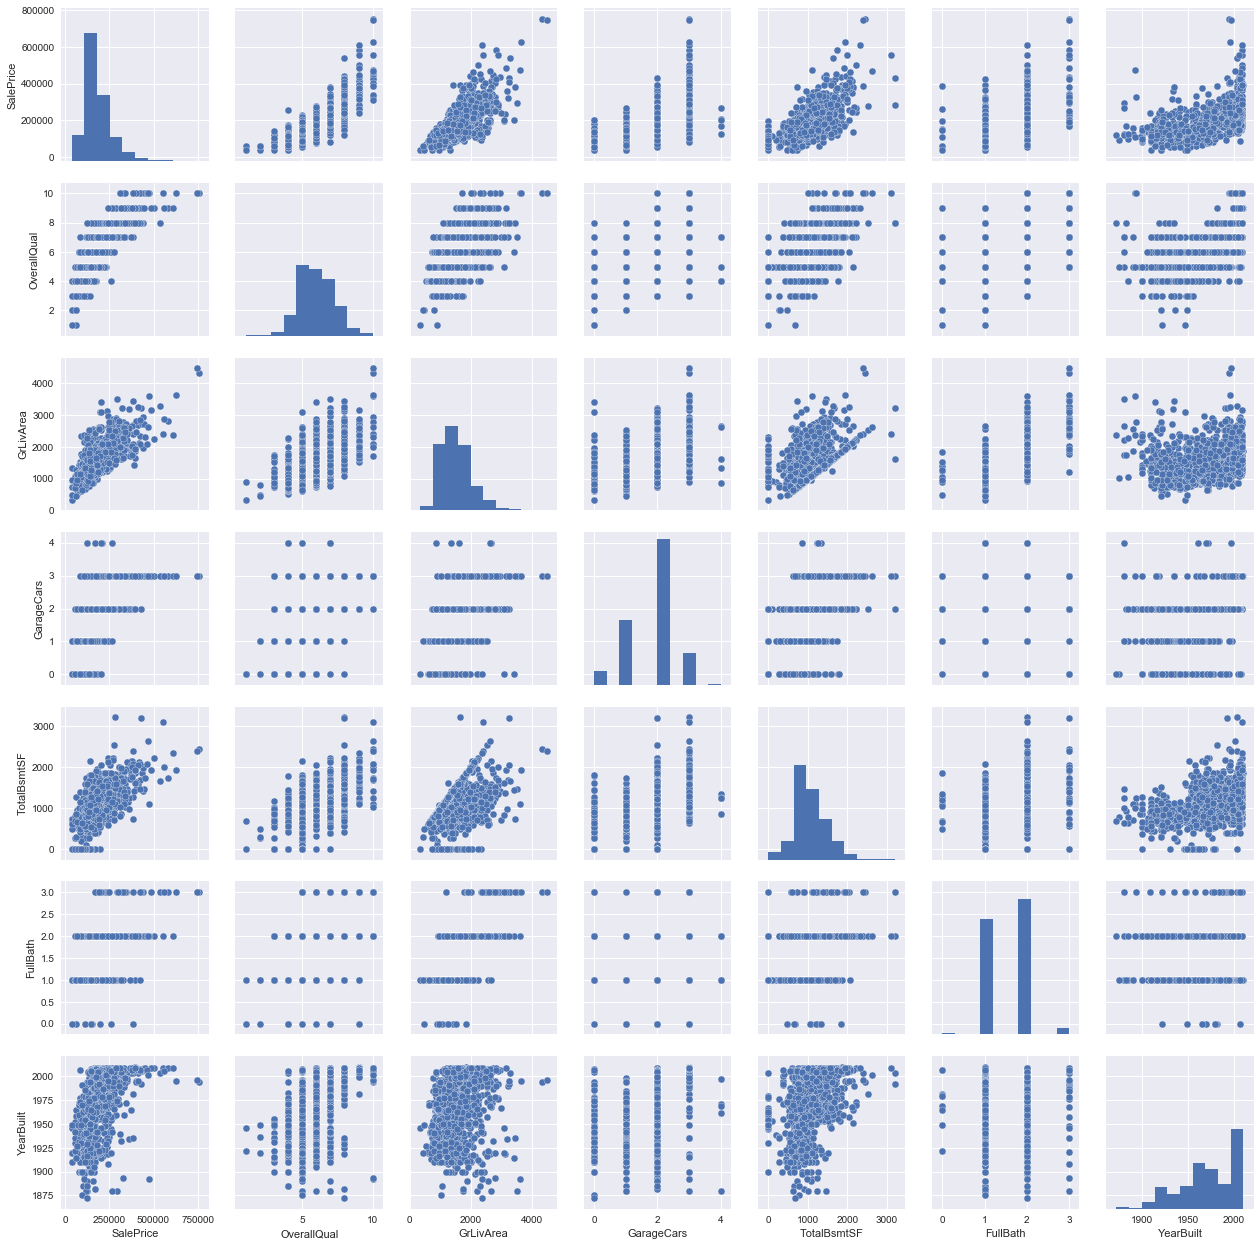

In [10]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

# Skewed Distribution

For symmetrically distributed data, the skewness should be about 0. A skewness value > 0 means that there is more weight in the left tail of the distribution.


Transform features with skewness > 0.75 into normal distribution using log(1+var).
E.g. log(1+sales price)

In [11]:
data = [go.Histogram(x=train['SalePrice'])]
layout = go.Layout(title='Distribution of Sales Price')
fig=go.Figure(data=data,layout=layout)
off.iplot(fig)

In [12]:
#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])
from scipy.stats import skew
#log transform skewed numeric features:
numeric_feats = train.dtypes[train.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

print(skewed_feats)
train[skewed_feats] = np.log1p(train[skewed_feats])

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal'],
      dtype='object')


In [13]:
data = [go.Histogram(x=train['SalePrice'])]
layout = go.Layout(title='Distribution of Sales Price')
fig=go.Figure(data=data,layout=layout)
off.iplot(fig)

# Dummy Variables and Missing Value

1. Drop ‘ID’
2. Create dummy variables for categorical features 
3. Replace the missing values with the mean of their respective column

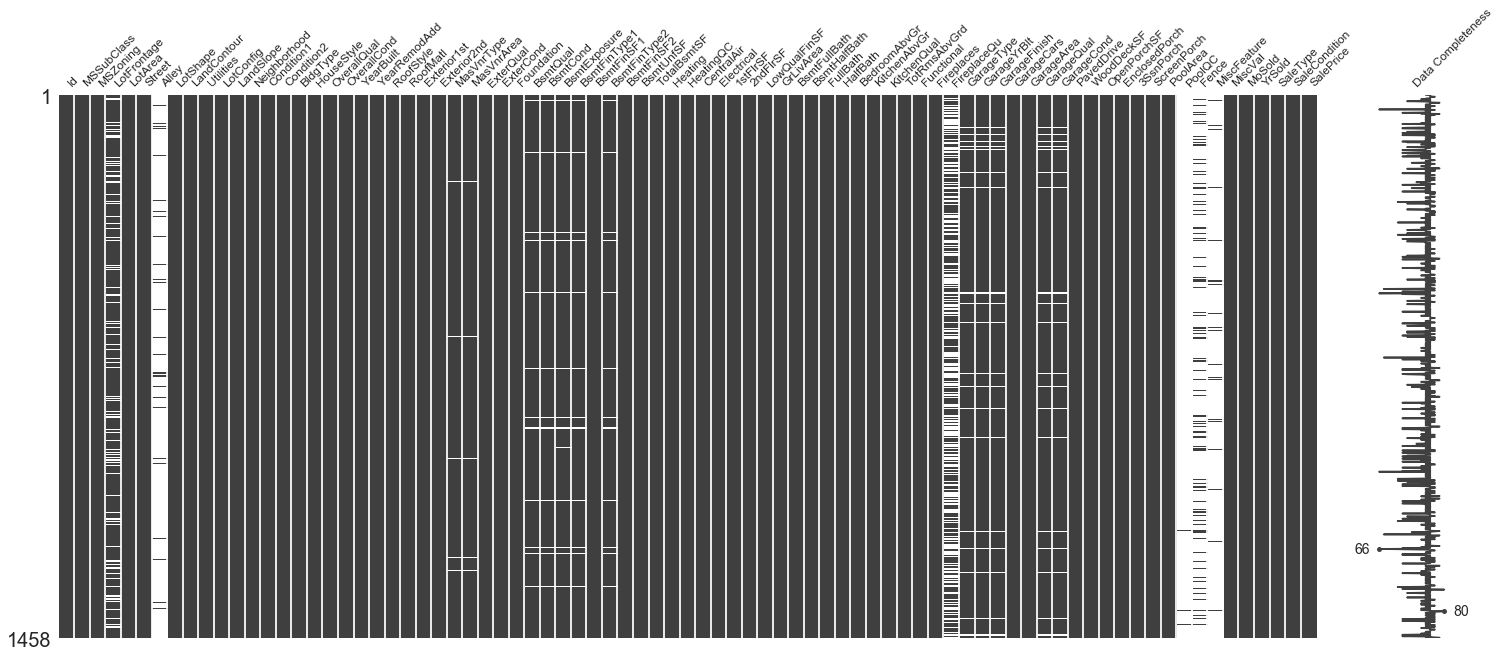

In [14]:
import missingno as msno
%matplotlib inline
msno.matrix(train,labels=True,fontsize=12)

There are several columns contain over 90% missing values, we can probably exclude those columns in our model. They are "Alley", "PoolQC", "Fense", and "MiscFeature". But let's keep them for now.

In [15]:
train.drop("Id", axis = 1, inplace = True)
train = pd.get_dummies(train)
train = train.fillna(train.mean())
print(train.shape)
train.head()

(1458, 288)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,0,0,0,1,0,0,0,0,1,0


After all the transformations, we have 1458 rows and 288 columns.

Years are treated as numeric variables because there are too many unique values, and there seems to be a trend.

In [16]:
variable='YearBuilt'

data = [dict(
  type = 'box',
  x = train[variable],
  y = train['SalePrice'],
  mode = 'markers',

)]

layout={
        'xaxis': {'title': variable},
        'yaxis': {'title': "Sales Price"},
        "title":"Distribution of Sales Price by " +variable
    }

off.iplot({'data': data, 'layout':layout}, validate=False)

# Modeling

1. Linear regression model with L2 regularization
2. Cross validation to optimize regularization coefficients
3. Evaluation metrics
4. Model presentation

In [17]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [18]:
Y=train['SalePrice']
X=train.drop('SalePrice',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [19]:
def r2_cv(model):
    r2= cross_val_score(model, X_train, y_train, scoring="r2", cv = 5)
    return(r2)

In [20]:
model_ridge = Ridge()

In [21]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [r2_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

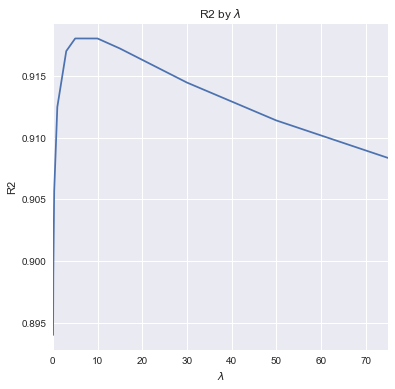

In [22]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "R2 by $\lambda$",figsize=(6,6))
plt.xlabel("$\lambda$")
plt.ylabel("R2")

The optimal lambda is 10. 

In [23]:
model_ridge=Ridge(alpha=10).fit(X_train,y_train)

In [24]:
print("R2 on training set")
print(r2_score(y_train, model_ridge.predict(X_train)))

R2 on training set
0.945729682667


In [25]:
print("R2 on test set")
print(r2_score(y_test, model_ridge.predict(X_test)))

R2 on test set
0.914022993693


In [26]:
coef = pd.Series(model_ridge.coef_, index = X_train.columns)
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

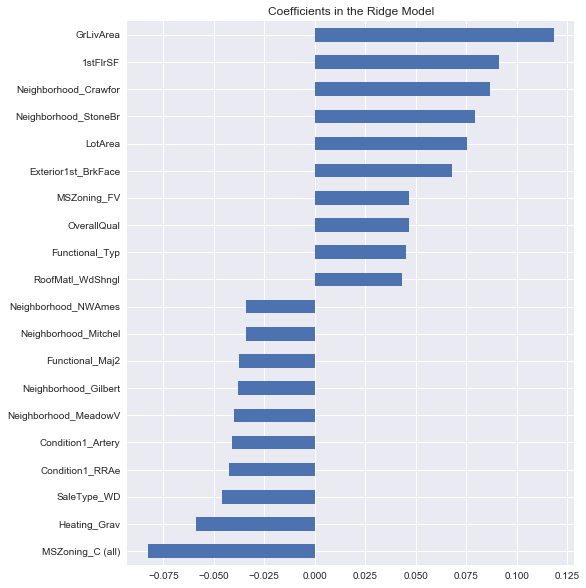

In [27]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")

Areas (ground living area, 1st floor square feet, lot area), some neighborhoods, floating village zoning, wood shingles roof and brick face exterior can improve the sale price.
Commercial zoning, gravity furnance heating, and adjacency to railway or arterial road will have negative impact on sale price. 


Residual Plot

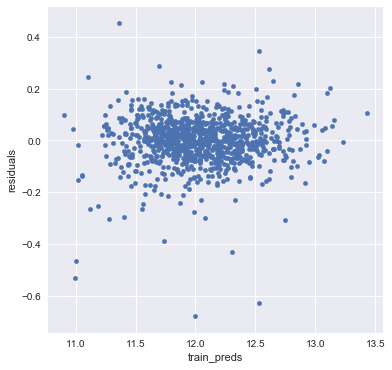

In [28]:
preds = pd.DataFrame({"train_preds":model_ridge.predict(X_train), "train_actual":y_train})
preds["residuals"] = preds["train_actual"] - preds["train_preds"]
preds.plot(x = "train_preds", y = "residuals",kind = "scatter",figsize=(6,6))

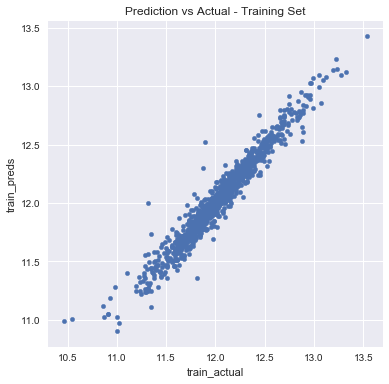

In [29]:
preds.plot(x = "train_actual", y = "train_preds",kind = "scatter",figsize=(6,6))
plt.title("Prediction vs Actual - Training Set")

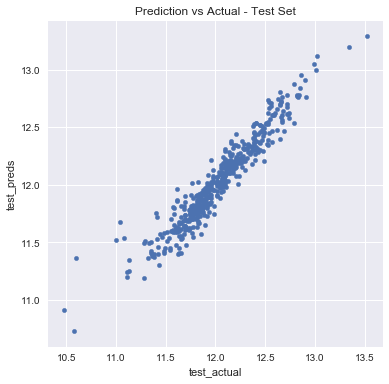

In [30]:
test_preds = pd.DataFrame({"test_preds":model_ridge.predict(X_test), "test_actual":y_test})
test_preds.plot(x = "test_actual", y = "test_preds",kind = "scatter",figsize=(6,6))
plt.title("Prediction vs Actual - Test Set")